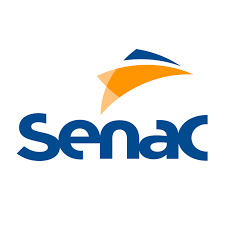

***FACULDADE SENAC DE PERNAMBUCO***


---

**ALUNAS:** DORALICE FEIJÓ MOTA

**TURMA:** TADS-019

---

## **Justificativa da escolha do DataSet:**
---

Optamos por utilizar o conjunto de dados do INEP por se tratar da maior prova do Brasil, especificamente os dados do ENEM de 2022 com dois dias consecutivos, englobando um amplo espectro de áreas de conhecimento, a saber: linguagens, códigos e suas tecnologias; ciências humanas e suas tecnologias; ciências da natureza e suas tecnologias; e matemática e suas tecnologias. Além disso, uma redação também foi incluída no exame. Os dados estão disponíveis no [site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem).

Acreditamos que esse formato da prova oferece um vasto campo de possibilidades para análise e aplicação dos conceitos abordados na atividade proposta. A diversidade de disciplinas e o acréscimo da redação possibilitam uma investigação abrangente, que pode revelar insights valiosos sobre o desempenho dos candidatos e suas pontuações ao longo dessas diferentes áreas de conhecimento, contribuindo assim para uma análise mais completa e rica em dados.

## Análise Exploratória - ENEM 2022
---

### Importando as bibliotecas que serão utilizadas, a base de dados "crua" e levantando um panorama inicial dos dados
---

In [5]:
pip install matplotlib

In [6]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
!python.exe -m pip install --upgrade pip

In [3]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importando a base dos dados do ano de 2022 disponível no site do [INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) e buscando conhecer um pouco os dados.

In [4]:
df = pd.read_csv ('MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')

In [6]:
# Conhecendo o tamanho da nossa base
print(f'A base de dados apresenta {df.shape[0]} linhas e {df.shape[1]} colunas')

A base de dados apresenta 3476105 linhas e 76 colunas


In [4]:
# Visualizando as 5 primeiras linhas da base para vermos um pouco de como estão os dados
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [5]:
# Verificando como estão organizados e quais os seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [6]:
# Criando um dataframe reserva caso aconteça algum imprevisto com o que estivermos trablhando
df_reserva_original = df.copy()

In [7]:
# Tipos dos dados existentes em cada coluna
df.dtypes.value_counts()

object     37
float64    21
int64      18
dtype: int64

### Criando um novo DataFrame apenas com as colunas que iremos utilizar na análise
---

Com base nas análises feitas nas células acima e no [dicionário de dados](Dicionário_Microdados_Enem_2022.xlsx), optamos por utilizar somente algumas colunas que demonstraram ter mais informações importantes.

In [8]:
colunas_necessarias = ['NU_INSCRICAO', # Número de inscrição do candidato(a)
                        'TP_FAIXA_ETARIA', # Idade/Faixa etária do candidato(a)
                        'TP_SEXO', # Sexo do candidato(a)
                        'TP_COR_RACA', # Raça do candidadto(a)
                        'TP_ESCOLA', # Tipo da escola (privada/pública)
                        'TP_PRESENCA_LC', # Presença na prova de Língua Portuguesa
                        'TP_PRESENCA_MT', # Presença na prova de Matemática
                        'Q001', # Até que série seu pai, ou o homem responsável por você, estudou?
                        'Q002', # Até que série sua mãe, ou a mulher responsável por você, estudou?
                        'Q006' # Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
                        ]

dados = df[colunas_necessarias]

print(f'A base de dados apresenta {dados.shape[0]} linhas e {dados.shape[1]} colunas')

A base de dados apresenta 3476105 linhas e 10 colunas


In [9]:
# Imprimir cabeçalho
dados.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_LC,TP_PRESENCA_MT,Q001,Q002,Q006
0,210057943671,14,M,2,1,0,0,A,A,B
1,210057516120,14,M,1,1,0,0,D,D,Q
2,210057280536,5,F,2,1,1,1,E,F,B
3,210055724397,6,M,3,1,1,1,C,A,A
4,210055097896,4,M,3,1,0,0,D,B,B


In [10]:
# Criando um dataframe reserva caso aconteça algum imprevisto com o que estivermos trablhando
dados_reserva = dados.copy()

Como as provas de Linguagens e Código e CIências Humanas são aplicadas em conjunto/no mesmo dia e o mesmo é válido para Matemática e suas Tecnologias e Ciências da Natureza, iremos renomear as colunas TP_PRE'SENCA_LC e 'TP_PRESENCA_MT' para, respectivamente, 'TP_PRESENCA_LC_CH' e 'TP_PRESENCA_MT_CN', para assim deixarmos claro que estamos englobando as 4 provas.

In [11]:
dados.rename(columns={'TP_PRESENCA_LC': 'TP_PRESENCA_LC_CH', 'TP_PRESENCA_MT': 'TP_PRESENCA_MT_CN'}, inplace=True)

C:\Users\thiag\AppData\Local\Temp\ipykernel_26728\4050887217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.rename(columns={'TP_PRESENCA_LC': 'TP_PRESENCA_LC_CH', 'TP_PRESENCA_MT': 'TP_PRESENCA_MT_CN'}, inplace=True)


In [12]:
# Verificando a quantidade de valores nulos por coluna
dados.isna().sum()

NU_INSCRICAO         0
TP_FAIXA_ETARIA      0
TP_SEXO              0
TP_COR_RACA          0
TP_ESCOLA            0
TP_PRESENCA_LC_CH    0
TP_PRESENCA_MT_CN    0
Q001                 0
Q002                 0
Q006                 0
dtype: int64

In [13]:
# Vendo quais os tipos de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   NU_INSCRICAO       int64 
 1   TP_FAIXA_ETARIA    int64 
 2   TP_SEXO            object
 3   TP_COR_RACA        int64 
 4   TP_ESCOLA          int64 
 5   TP_PRESENCA_LC_CH  int64 
 6   TP_PRESENCA_MT_CN  int64 
 7   Q001               object
 8   Q002               object
 9   Q006               object
dtypes: int64(6), object(4)
memory usage: 265.2+ MB


In [14]:
# Tipos dos dados existentes em cada coluna
dados.dtypes.value_counts()

int64     6
object    4
dtype: int64

#### Realizando a substituição dos dados que estão como "código" pela descrição disponível no dicionário de dados

In [95]:
# Dicionários com o código e sua respectiva correspondência/significado

tp_sexo = {
    "F" : "Feminino",
    "M" : "Masculino"
}

tp_cor_raca = {
        0 : "Não declarado",
        1 : "Branca",
        2 : "Preta",
        3 : "Parda",
        4 : "Amarela",
        5 : "Indígena ",
        6 : "Não dispõe da informação"
    }

tp_escola = {
        1 : "Não Respondeu",
        2 : "Pública",
        3 : "Privada"
    }

tp_presenca = {
        0 : "Faltou à prova",
        1 : "Presente na prova",
        2 : "Eliminado na prova"
    }

q001_2 = {
        "A" : "Nunca estudou.",
        "B" : "Não completou a 4ª série/5º ano do Ensino Fundamental.",
        "C" : "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
        "D" : "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
        "E" : "Completou o Ensino Médio, mas não completou a Faculdade.",
        "F" : "Completou a Faculdade, mas não completou a Pós-graduação.",
        "G" : "Completou a Pós-graduação.",
        "H" : "Não sei."
    }

q006 = {
        "A" : "Nenhuma Renda",
        "B" : "Até R$ 1.212,00",
        "C" : "De R$ 1.212,01 até R$ 1.818,00.",
        "D" : "De R$ 1.818,01 até R$ 2.424,00.",
        "E" : "De R$ 2.424,01 até R$ 3.030,00.",
        "F" : "De R$ 3.030,01 até R$ 3.636,00.",
        "G" : "De R$ 3.636,01 até R$ 4.848,00.",
        "H" : "De R$ 4.848,01 até R$ 6.060,00.",
        "I" : "De R$ 6.060,01 até R$ 7.272,00.",
        "J" : "De R$ 7.272,01 até R$ 8.484,00.",
        "K" : "De R$ 8.484,01 até R$ 9.696,00.",
        "L" : "De R$ 9.696,01 até R$ 10.908,00.",
        "M" : "De R$ 10.908,01 até R$ 12.120,00.",
        "N" : "De R$ 12.120,01 até R$ 14.544,00.",
        "O" : "De R$ 14.544,01 até R$ 18.180,00.",
        "P" : "De R$ 18.180,01 até R$ 24.240,00.",
        "Q" : "Acima de R$ 24.240,00."
    }

In [96]:
# Para as faixas etárias, optamos por criar novas faixas afim de agrupar melhor os dados
tp_faixa_etaria_original = {
        1 : "Menor de 17 anos",
        2 : "17 anos",
        3 : "18 anos",
        4 : "19 anos",
        5 : "20 anos",
        6 : "21 anos",
        7 : "22 anos",
        8 : "23 anos",
        9 : "24 anos",
        10 : "25 anos",
        11 : "Entre 26 e 30 anos",
        12 : "Entre 31 e 35 anos",
        13 : "Entre 36 e 40 anos",
        14 : "Entre 41 e 45 anos",
        15 : "Entre 46 e 50 anos",
        16 : "Entre 51 e 55 anos",
        17 : "Entre 56 e 60 anos",
        18 : "Entre 61 e 65 anos",
        19 : "Entre 66 e 70 anos",
        20 : "Maior de 70 anos"
    }

tp_faixa_etaria_ajustada = {
        1 : "Menor de 18 anos",
        2 : "Menor de 18 anos",
        3 : "Entre 18 e 25 anos",
        4 : "Entre 18 e 25 anos",
        5 : "Entre 18 e 25 anos",
        6 : "Entre 18 e 25 anos",
        7 : "Entre 18 e 25 anos",
        8 : "Entre 18 e 25 anos",
        9 : "Entre 18 e 25 anos",
        10 : "Entre 18 e 25 anos",
        11 : "Entre 26 e 30 anos",
        12 : "Entre 31 e 35 anos",
        13 : "Entre 36 e 40 anos",
        14 : "Entre 41 e 45 anos",
        15 : "Entre 46 e 50 anos",
        16 : "Entre 51 e 55 anos",
        17 : "Entre 56 e 60 anos",
        18 : "Entre 61 e 65 anos",
        19 : "Entre 66 e 70 anos",
        20 : "Maior de 70 anos"
    }

In [97]:
# Realizando a substituição no nosso dataframe

dados['TP_SEXO'] = dados['TP_SEXO'].replace(tp_sexo)
dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].replace(tp_faixa_etaria_ajustada)
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].replace(tp_cor_raca)
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].replace(tp_escola)
dados['TP_PRESENCA_LC_CH'] = dados['TP_PRESENCA_LC_CH'].replace(tp_presenca)
dados['TP_PRESENCA_MT_CN'] = dados['TP_PRESENCA_MT_CN'].replace(tp_presenca)
dados['Q001'] = dados['Q001'].replace(q001_2)
dados['Q002'] = dados['Q002'].replace(q001_2)
dados['Q006'] = dados['Q006'].replace(q006)

C:\Users\thiag\AppData\Local\Temp\ipykernel_26728\3202363845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TP_SEXO'] = dados['TP_SEXO'].replace(tp_sexo)
C:\Users\thiag\AppData\Local\Temp\ipykernel_26728\3202363845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].replace(tp_faixa_etaria_ajustada)
C:\Users\thiag\AppData\Local\Temp\ipykernel_26728\3202363845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [98]:
# Verificando se os dados foram todos ajustados corretamente
dados.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_LC_CH,TP_PRESENCA_MT_CN,Q001,Q002,Q006
0,210057943671,Entre 41 e 45 anos,Masculino,Preta,Não Respondeu,Faltou à prova,Faltou à prova,Nunca estudou.,Nunca estudou.,"Até R$ 1.212,00"
1,210057516120,Entre 41 e 45 anos,Masculino,Branca,Não Respondeu,Faltou à prova,Faltou à prova,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,"Acima de R$ 24.240,00."
2,210057280536,Entre 18 e 25 anos,Feminino,Preta,Não Respondeu,Presente na prova,Presente na prova,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós...","Até R$ 1.212,00"
3,210055724397,Entre 18 e 25 anos,Masculino,Parda,Não Respondeu,Presente na prova,Presente na prova,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou.,Nenhuma Renda
4,210055097896,Entre 18 e 25 anos,Masculino,Parda,Não Respondeu,Faltou à prova,Faltou à prova,Completou a 8ª série/9º ano do Ensino Fundamen...,Não completou a 4ª série/5º ano do Ensino Fund...,"Até R$ 1.212,00"


In [99]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   NU_INSCRICAO       int64 
 1   TP_FAIXA_ETARIA    object
 2   TP_SEXO            object
 3   TP_COR_RACA        object
 4   TP_ESCOLA          object
 5   TP_PRESENCA_LC_CH  object
 6   TP_PRESENCA_MT_CN  object
 7   Q001               object
 8   Q002               object
 9   Q006               object
dtypes: int64(1), object(9)
memory usage: 265.2+ MB


### Iniciando as análises
---

Resumo estatístico dos nossos dados, onde podemos ver a quantidade de resgistros (count), a quantidade de valores únicos (unique), o valor mais frequente/maior quantidade (top) e a quantidade de vezes que esse valor mais frequente aparece (freq).

In [100]:
# Resumo do Data Frame onde mostra o resultado médio(maior quantidade) das colunas selecionadas.
dados.describe(include = 'O')

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_LC_CH,TP_PRESENCA_MT_CN,Q001,Q002,Q006
count,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105
unique,12,2,6,3,3,3,8,8,17
top,Entre 18 e 25 anos,Feminino,Parda,Não Respondeu,Presente na prova,Presente na prova,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Até R$ 1.212,00"
freq,1980649,2120519,1488844,2158545,2493442,2355395,1002676,1217025,1022869


##### Quantidade de pessoas por faixa etária:

In [101]:
# Quantidade percentual dos participantes por faixa etária
qtd_faixas = dict(dados['TP_FAIXA_ETARIA'].value_counts())
qtd_faixas

{'Entre 18 e 25 anos': 1980649,
 'Menor de 18 anos': 1014883,
 'Entre 26 e 30 anos': 189700,
 'Entre 31 e 35 anos': 103634,
 'Entre 36 e 40 anos': 74162,
 'Entre 41 e 45 anos': 49735,
 'Entre 46 e 50 anos': 30066,
 'Entre 51 e 55 anos': 17688,
 'Entre 56 e 60 anos': 9688,
 'Entre 61 e 65 anos': 3817,
 'Entre 66 e 70 anos': 1505,
 'Maior de 70 anos': 578}

In [102]:
# Quantidade percentual dos participantes por faixa etária
qtd_faixas_perc = {}
for k, v in qtd_faixas.items():
    percentual = v / len(dados)
    qtd_faixas_perc[k] = round(percentual*100, 2)

qtd_faixas_perc

{'Entre 18 e 25 anos': 56.98,
 'Menor de 18 anos': 29.2,
 'Entre 26 e 30 anos': 5.46,
 'Entre 31 e 35 anos': 2.98,
 'Entre 36 e 40 anos': 2.13,
 'Entre 41 e 45 anos': 1.43,
 'Entre 46 e 50 anos': 0.86,
 'Entre 51 e 55 anos': 0.51,
 'Entre 56 e 60 anos': 0.28,
 'Entre 61 e 65 anos': 0.11,
 'Entre 66 e 70 anos': 0.04,
 'Maior de 70 anos': 0.02}

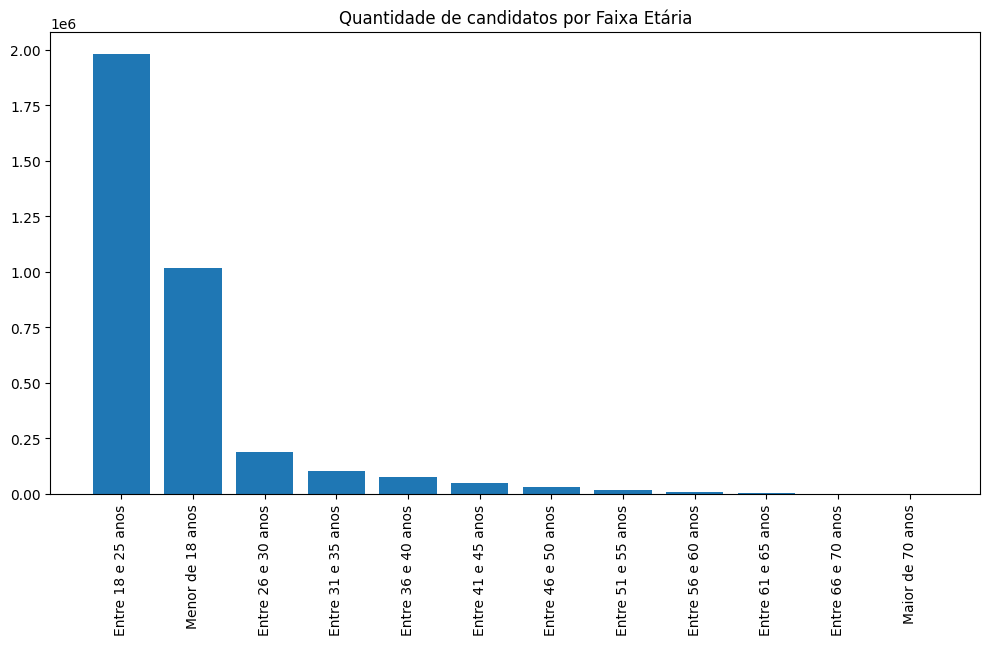

In [103]:
plt.figure(figsize=(12, 6))
plt.bar(qtd_faixas.keys(), qtd_faixas.values())
plt.title('Quantidade de candidatos por Faixa Etária', loc='center')
plt.xticks(rotation=90)
plt.show()

##### Quantidade de pessoas por sexo:

In [104]:
# Quantidade de participantes por 
qtd_participantes_sexo = dict(dados['TP_SEXO'].value_counts())
qtd_participantes_sexo

{'Feminino': 2120519, 'Masculino': 1355586}

In [105]:
# Quantidade percentual dos participantes por sexo
qtd_participantes_sexo_perc = {}
for k, v in qtd_participantes_sexo.items():
    percentual = v / len(dados)
    qtd_participantes_sexo_perc[k] = round(percentual*100, 2)

qtd_participantes_sexo_perc

{'Feminino': 61.0, 'Masculino': 39.0}

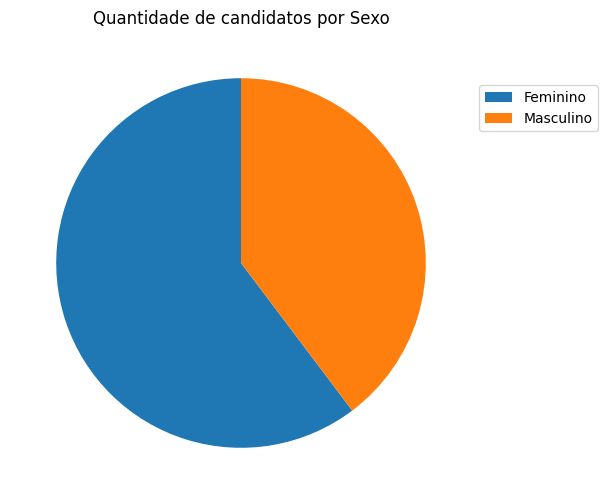

In [115]:
plt.figure(figsize=(12, 6))
plt.pie(qtd_participantes_sexo.values(), startangle = 90)
plt.title('Quantidade de candidatos por Sexo', loc='center')
plt.legend(qtd_participantes_sexo.keys(), bbox_to_anchor=(1, 0.9))
plt.show()

##### Quantidade de pessoas por raça:

In [86]:
# Quantidade de participantes por raça
qtd_participantes_racas = dict(dados['TP_COR_RACA'].value_counts())
qtd_participantes_racas

{'Parda': 1488844,
 'Branca': 1428081,
 'Preta': 408422,
 'Amarela': 66051,
 'Não declarado': 64867,
 'Indígena ': 19840}

In [107]:
# Quantidade percentual dos participantes por raça
qtd_participantes_racas_perc = {}
for k, v in qtd_participantes_racas.items():
    percentual = v / len(dados)
    qtd_participantes_racas_perc[k] = round(percentual*100, 2)

qtd_participantes_racas_perc

{'Parda': 42.83,
 'Branca': 41.08,
 'Preta': 11.75,
 'Amarela': 1.9,
 'Não declarado': 1.87,
 'Indígena ': 0.57}

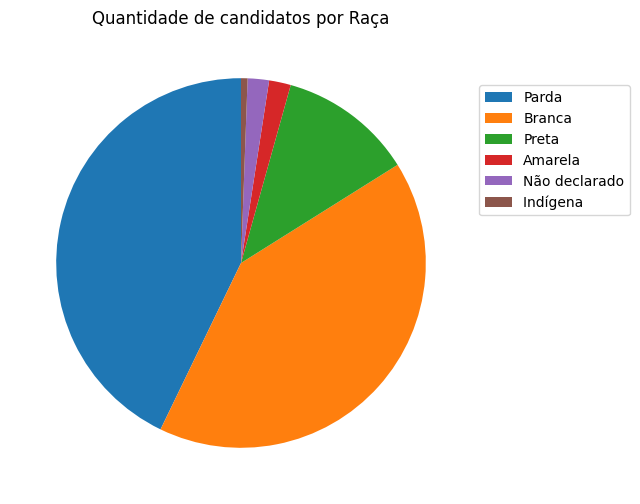

In [116]:
plt.figure(figsize=(12, 6))
plt.title('Quantidade de candidatos por Raça', loc='center')
plt.pie(qtd_participantes_racas.values(), startangle = 90)
plt.legend(qtd_participantes_racas.keys(), bbox_to_anchor=(1, 0.9))
plt.show()

##### Análise por renda

In [83]:
qtd_faixas_renda = dict(dados['Q006'].value_counts())
qtd_faixas_renda

{'Até R$ 1.212,00': 1022869,
 'De R$ 1.212,01 até R$ 1.818,00.': 584278,
 'De R$ 1.818,01 até R$ 2.424,00.': 414266,
 'De R$ 2.424,01 até R$ 3.030,00.': 276704,
 'Nenhuma Renda': 204475,
 'De R$ 3.636,01 até R$ 4.848,00.': 194319,
 'De R$ 4.848,01 até R$ 6.060,00.': 188751,
 'De R$ 3.030,01 até R$ 3.636,00.': 158091,
 'De R$ 6.060,01 até R$ 7.272,00.': 78916,
 'De R$ 7.272,01 até R$ 8.484,00.': 54984,
 'De R$ 9.696,01 até R$ 10.908,00.': 51295,
 'Acima de R$ 24.240,00.': 49740,
 'De R$ 10.908,01 até R$ 12.120,00.': 48530,
 'De R$ 14.544,01 até R$ 18.180,00.': 39034,
 'De R$ 8.484,01 até R$ 9.696,00.': 38997,
 'De R$ 18.180,01 até R$ 24.240,00.': 36032,
 'De R$ 12.120,01 até R$ 14.544,00.': 34824}

In [84]:
# Quantidade percentual dos participantes por faixa de renda
qtd_faixas_renda_perc = {}
for k, v in qtd_faixas_renda.items():
    percentual = v / len(dados)
    qtd_faixas_renda_perc[k] = round(percentual*100, 2)

qtd_faixas_renda_perc

{'Até R$ 1.212,00': 29.43,
 'De R$ 1.212,01 até R$ 1.818,00.': 16.81,
 'De R$ 1.818,01 até R$ 2.424,00.': 11.92,
 'De R$ 2.424,01 até R$ 3.030,00.': 7.96,
 'Nenhuma Renda': 5.88,
 'De R$ 3.636,01 até R$ 4.848,00.': 5.59,
 'De R$ 4.848,01 até R$ 6.060,00.': 5.43,
 'De R$ 3.030,01 até R$ 3.636,00.': 4.55,
 'De R$ 6.060,01 até R$ 7.272,00.': 2.27,
 'De R$ 7.272,01 até R$ 8.484,00.': 1.58,
 'De R$ 9.696,01 até R$ 10.908,00.': 1.48,
 'Acima de R$ 24.240,00.': 1.43,
 'De R$ 10.908,01 até R$ 12.120,00.': 1.4,
 'De R$ 14.544,01 até R$ 18.180,00.': 1.12,
 'De R$ 8.484,01 até R$ 9.696,00.': 1.12,
 'De R$ 18.180,01 até R$ 24.240,00.': 1.04,
 'De R$ 12.120,01 até R$ 14.544,00.': 1.0}

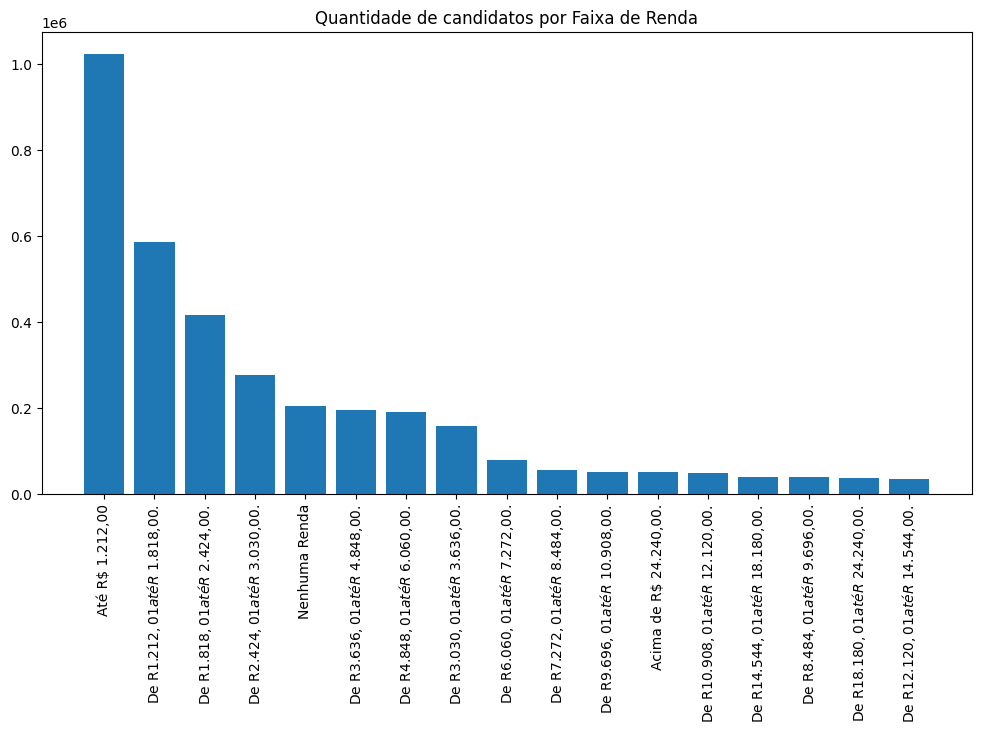

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(qtd_faixas_renda.keys(), qtd_faixas_renda.values())
plt.title('Quantidade de candidatos por Faixa de Renda', loc='center')
plt.xticks(rotation=90)
plt.show()

#### Características das pessoas pertencentes a principal faixa etária

Estamos focando na faixa etária 'Entre 18 e 25 anos', pois vimos que ela representa, aproximadamente, 57% de toda nossa base de dados.

In [109]:
# Criando um dataframe para analisarmos melhor essa faixa etária
df_entre_18_25 = dados.loc[dados['TP_FAIXA_ETARIA'] == 'Entre 18 e 25 anos']
df_entre_18_25.describe(include = 'O')

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_LC_CH,TP_PRESENCA_MT_CN,Q001,Q002,Q006
count,1980649,1980649,1980649,1980649,1980649,1980649,1980649,1980649,1980649
unique,1,2,6,3,3,3,8,8,17
top,Entre 18 e 25 anos,Feminino,Parda,Não Respondeu,Presente na prova,Presente na prova,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Até R$ 1.212,00"
freq,1980649,1193881,869674,1205980,1371711,1298077,578507,727387,649665


##### Quantidade de pessoas por sexo:

In [111]:
# Quantidade de participantes por 
qtd_participantes_sexo2 = dict(df_entre_18_25['TP_SEXO'].value_counts())
qtd_participantes_sexo2

{'Feminino': 1193881, 'Masculino': 786768}

In [113]:
# Quantidade percentual dos participantes por sexo
qtd_participantes_sexo_perc2 = {}
for k, v in qtd_participantes_sexo2.items():
    percentual = v / len(df_entre_18_25)
    qtd_participantes_sexo_perc2[k] = round(percentual*100, 2)

qtd_participantes_sexo_perc2

{'Feminino': 60.28, 'Masculino': 39.72}

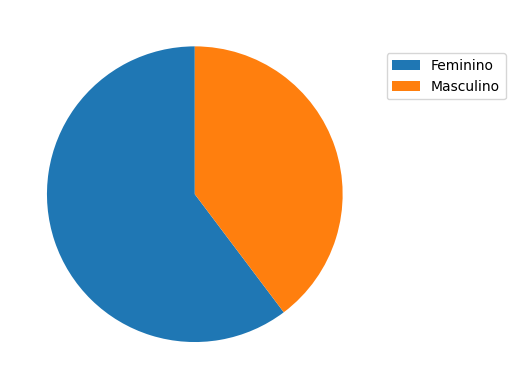

In [114]:
plt.pie(qtd_participantes_sexo2.values(), startangle = 90)
plt.legend(qtd_participantes_sexo2.keys(), bbox_to_anchor=(1, 0.9))
plt.show()

##### Quantidade de pessoas por raça:

In [117]:
# Quantidade de participantes por raça
qtd_participantes_racas2 = dict(df_entre_18_25['TP_COR_RACA'].value_counts())
qtd_participantes_racas2

{'Parda': 869674,
 'Branca': 769378,
 'Preta': 253546,
 'Amarela': 39160,
 'Não declarado': 36596,
 'Indígena ': 12295}

In [120]:
# Quantidade percentual dos participantes por raça
qtd_participantes_racas_perc2 = {}
for k, v in qtd_participantes_racas2.items():
    percentual = v / len(df_entre_18_25)
    qtd_participantes_racas_perc2[k] = round(percentual*100, 2)

qtd_participantes_racas_perc2

{'Parda': 43.91,
 'Branca': 38.84,
 'Preta': 12.8,
 'Amarela': 1.98,
 'Não declarado': 1.85,
 'Indígena ': 0.62}

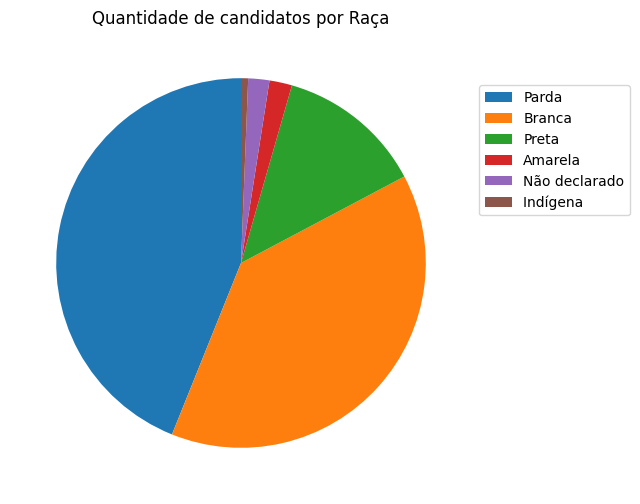

In [121]:
plt.figure(figsize=(12, 6))
plt.title('Quantidade de candidatos por Raça', loc='center')
plt.pie(qtd_participantes_racas2.values(), startangle = 90)
plt.legend(qtd_participantes_racas2.keys(), bbox_to_anchor=(1, 0.9))
plt.show()

##### Análise por renda

In [125]:
qtd_faixas_renda2 = dict(df_entre_18_25['Q006'].value_counts())
qtd_faixas_renda2

{'Até R$ 1.212,00': 649665,
 'De R$ 1.212,01 até R$ 1.818,00.': 354769,
 'De R$ 1.818,01 até R$ 2.424,00.': 239713,
 'De R$ 2.424,01 até R$ 3.030,00.': 153343,
 'Nenhuma Renda': 125051,
 'De R$ 3.636,01 até R$ 4.848,00.': 99895,
 'De R$ 4.848,01 até R$ 6.060,00.': 90737,
 'De R$ 3.030,01 até R$ 3.636,00.': 84442,
 'De R$ 6.060,01 até R$ 7.272,00.': 37305,
 'De R$ 7.272,01 até R$ 8.484,00.': 25034,
 'De R$ 9.696,01 até R$ 10.908,00.': 21744,
 'De R$ 10.908,01 até R$ 12.120,00.': 20439,
 'Acima de R$ 24.240,00.': 17696,
 'De R$ 8.484,01 até R$ 9.696,00.': 17565,
 'De R$ 14.544,01 até R$ 18.180,00.': 15360,
 'De R$ 12.120,01 até R$ 14.544,00.': 14273,
 'De R$ 18.180,01 até R$ 24.240,00.': 13618}

In [126]:
# Quantidade percentual dos participantes por faixa de renda
qtd_faixas_renda_perc2 = {}
for k, v in qtd_faixas_renda2.items():
    percentual = v / len(df_entre_18_25)
    qtd_faixas_renda_perc2[k] = round(percentual*100, 2)

qtd_faixas_renda_perc2

{'Até R$ 1.212,00': 32.8,
 'De R$ 1.212,01 até R$ 1.818,00.': 17.91,
 'De R$ 1.818,01 até R$ 2.424,00.': 12.1,
 'De R$ 2.424,01 até R$ 3.030,00.': 7.74,
 'Nenhuma Renda': 6.31,
 'De R$ 3.636,01 até R$ 4.848,00.': 5.04,
 'De R$ 4.848,01 até R$ 6.060,00.': 4.58,
 'De R$ 3.030,01 até R$ 3.636,00.': 4.26,
 'De R$ 6.060,01 até R$ 7.272,00.': 1.88,
 'De R$ 7.272,01 até R$ 8.484,00.': 1.26,
 'De R$ 9.696,01 até R$ 10.908,00.': 1.1,
 'De R$ 10.908,01 até R$ 12.120,00.': 1.03,
 'Acima de R$ 24.240,00.': 0.89,
 'De R$ 8.484,01 até R$ 9.696,00.': 0.89,
 'De R$ 14.544,01 até R$ 18.180,00.': 0.78,
 'De R$ 12.120,01 até R$ 14.544,00.': 0.72,
 'De R$ 18.180,01 até R$ 24.240,00.': 0.69}

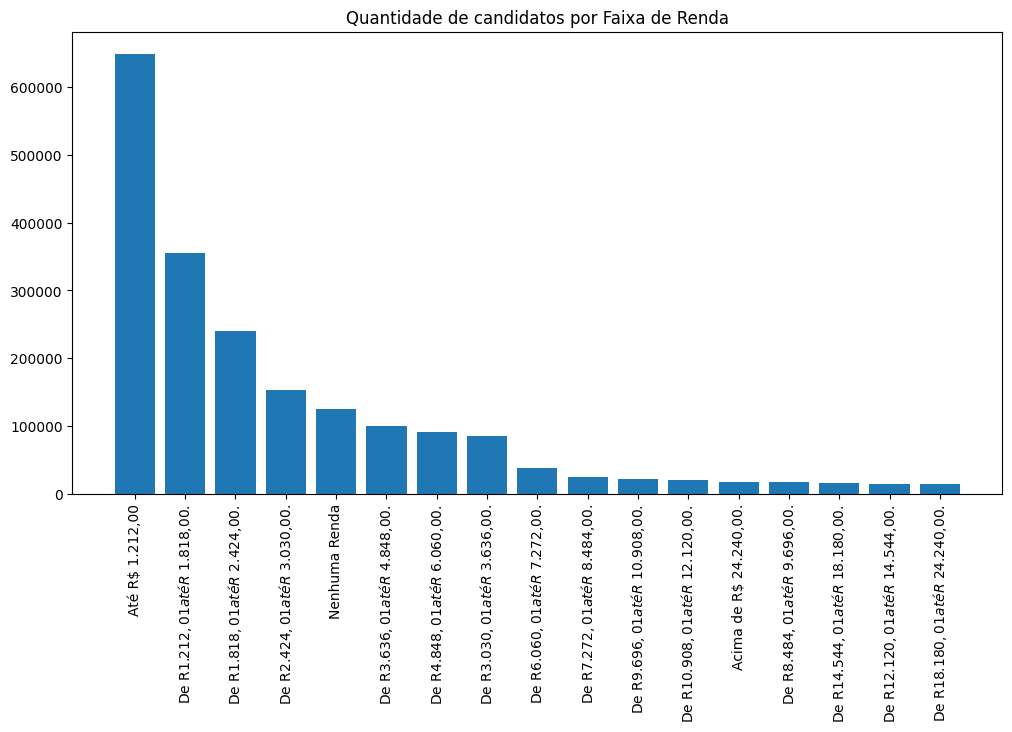

In [127]:
plt.figure(figsize=(12, 6))
plt.bar(qtd_faixas_renda2.keys(), qtd_faixas_renda2.values())
plt.title('Quantidade de candidatos por Faixa de Renda', loc='center')
plt.xticks(rotation=90)
plt.show()

### Conclusões
---

Atarvés das análises realizadas neste trabalho, pudemos conhecer um pouco mais dos perfis das pessoas que realizam o Exame Nacional do Ensino Médio (ENEM), a principal porta de entrada para o ensino superior. Especificamente tratando sobre o ano de 2022, podemos ver que:
- Aproximadamente 57% (1.980.649) dos candidatos possue entre 18 a 25 anos; 
- Quase 83% é constituído por pessoas que se consideram brancas ou pardas;
- Mais da metade dos candidatos que se inscreveram para realizar o exame (52,12%) possuem uma renda familiar menor que R$1.818,00;
- A faixa etária com maior número de inscritos reflete o perfil do todo;
- Um fator que, de certa forma, nos chamou a atenção é a quantidade de pessoas acima de 60 anos que se inscreveram para realizar a prova. Foram 5.900 inscritos (cerca de 0,17% da base). Embora pareça baixo, se comparado com o total de inscritos, mas que demonstram que não existe idade limite para se tentar alcançar seus sonhos!